In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy.io import arff

In [2]:
data = arff.loadarff('/content/EEG Eye State.arff')

In [3]:
dataset = pd.DataFrame(data[0]) #convert date into frame format
dataset.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [4]:
dataset.to_csv('EEG EYE State.csv')  #convert the file into csv

In [5]:
#replace b0 with 0 and b1 with 1
dataset.loc[dataset['eyeDetection'] == b'0', 'eyeDetection'] = 0
dataset.loc[dataset['eyeDetection'] == b'1', 'eyeDetection'] = 1

In [6]:
dataset

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [7]:
#checking null value is there in dataset
dataset.isna().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [8]:
x = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,-1].values.astype('int') 

In [9]:
print(x)

[[4329.23 4009.23 4289.23 ... 4280.51 4635.9  4393.85]
 [4324.62 4004.62 4293.85 ... 4279.49 4632.82 4384.1 ]
 [4327.69 4006.67 4295.38 ... 4282.05 4628.72 4389.23]
 ...
 [4277.44 3990.77 4246.67 ... 4257.95 4591.79 4339.49]
 [4284.62 3991.79 4251.28 ... 4267.18 4596.41 4350.77]
 [4287.69 3997.44 4260.   ... 4274.36 4597.95 4350.77]]


In [10]:
print(y)

[0 0 0 ... 1 1 1]


In [11]:
#splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)

In [12]:
#Feature scaling of x variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_test[0]

array([-1.05825061e-02,  2.05925976e-02, -3.96764153e-02, -7.07569424e-03,
        1.43915877e-01, -6.35185353e-03, -1.26950875e-02,  4.04123091e-01,
       -1.08772350e-03,  5.95249870e-01,  1.68452684e-01,  6.28895838e-02,
        1.59238620e-05, -9.30790132e-03])

In [13]:
#importing all the classification models 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
#to find accuracy 
from sklearn.metrics import accuracy_score, precision_score

In [14]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
lr = LogisticRegression(solver = 'liblinear')
per = Perceptron()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
gnb = GaussianNB()
adc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
gbc = GradientBoostingClassifier()
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xbg = XGBClassifier(n_estimators = 50, random_state = 2)

In [15]:
classifier = {
    'SVM': svc,
    'RandomForestClassifier' : rfc,
    'Logistic_Regression': lr,
    'Perceptron ': per,
    'KNN': knn,
    'Decision Tree': dtc,
    'Gaussian Naive Bayes': gnb,
    'AdaBoost': adc,
    'GradientBoosting' :gbc,
    'Bagging': bc,
    'ExtraTree': etc,
    'XGB': xbg
}

In [16]:
#function basically fit into train data and then test the test data
def train_classifier(classifier,x_train,x_test,y_train,y_test):
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy ,precision 

In [17]:
accuracy_score1 = []
precision_score2 = []
for name,clsr in classifier.items():
  current_accuracy,current_precision = train_classifier(clsr,x_train,x_test,y_train,y_test)
  print("Model - ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)
  print("\n")
  accuracy_score1.append(current_accuracy)
  precision_score2.append(current_precision)

Model -  SVM
Accuracy -  0.5146862483311081
Precision -  0.4540622627182992


Model -  RandomForestClassifier
Accuracy -  0.9168891855807744
Precision -  0.9221183800623053


Model -  Logistic_Regression
Accuracy -  0.5947930574098799
Precision -  0.5702479338842975


Model -  Perceptron 
Accuracy -  0.5884512683578104
Precision -  0.5668449197860963


Model -  KNN
Accuracy -  0.8317757009345794
Precision -  0.8156892612338157


Model -  Decision Tree
Accuracy -  0.6779038718291055
Precision -  0.6735849056603773


Model -  Gaussian Naive Bayes
Accuracy -  0.4432576769025367
Precision -  0.44261733470366565


Model -  AdaBoost
Accuracy -  0.735981308411215
Precision -  0.7199675324675324


Model -  GradientBoosting
Accuracy -  0.8090787716955942
Precision -  0.817347789824854


Model -  Bagging
Accuracy -  0.9122162883845126
Precision -  0.9205974842767296


Model -  ExtraTree
Accuracy -  0.9389185580774366
Precision -  0.9570747217806042


Model -  XGB
Accuracy -  0.9082109479305741
P

In [18]:
performance_dp = pd.DataFrame({'Algorithm ':classifier.keys(),'Accuracy ':accuracy_score1,'Precision':precision_score2})

In [19]:
performance_dp

,Algorithm,Accuracy,Precision
0,SVM,0.514686,0.454062
1,RandomForestClassifier,0.916889,0.922118
2,Logistic_Regression,0.594793,0.570248
3,Perceptron,0.588451,0.566845
4,KNN,0.831776,0.815689
5,Decision Tree,0.677904,0.673585
6,Gaussian Naive Bayes,0.443258,0.442617
7,AdaBoost,0.735981,0.719968
8,GradientBoosting,0.809079,0.817348
9,Bagging,0.912216,0.920597


In [20]:
#we can select  our extratree classifier model as it has highest accuracy and precision so it is a good model


In [49]:
import pickle
pickle.dump(etc,open('/content/model.pkl','wb'))
pickle.dump(sc,open('/content/scaler.pkl','wb'))

In [50]:
model_loaded = pickle.load(open('/content/model.pkl','rb'))
scaler_loaded = pickle.load(open('/content/scaler.pkl','rb'))

In [40]:
y_pred = model_loaded.predict(x_test)
print(y_pred)
if(y_pred[0]==y_test[0]):
  print(x_test) 

[1 0 1 ... 1 0 1]
[[-1.05825061e-02  2.05925976e-02 -3.96764153e-02 ...  6.28895838e-02
   1.59238620e-05 -9.30790132e-03]
 [-1.22407724e-02 -3.24218870e-01  1.33459356e-02 ... -3.55454235e-01
  -1.09994276e-02 -1.21896235e-02]
 [-1.05825061e-02 -5.25677551e-02  2.38678807e-02 ... -1.85867310e-01
  -2.50425201e-02 -1.00093532e-02]
 ...
 [-1.93224230e-03 -9.61875537e-01 -8.19705085e-02 ...  6.28326353e-01
   1.63390757e-02 -6.34874608e-03]
 [-2.08910362e-02  2.60860163e-01 -7.14485634e-02 ... -1.74620323e-01
  -4.74433626e-02 -1.51472605e-02]
 [-1.13219062e-02  1.25136500e-01  2.24816401e-01 ...  1.76021043e-01
  -4.92173704e-03 -7.67269855e-03]]


In [25]:
ans = pd.DataFrame({'Actual value ':y_test,'Predicted Value':y_pred})
ans

,Actual value,Predicted Value
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
2991,1,1
2992,0,1
2993,1,1
2994,0,0


In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",cm)
print("\nAccuracy of our model is ",accuracy_score(y_test,y_pred))

Confusion matrix is 
 [[1609   54]
 [ 129 1204]]

Accuracy of our model is  0.9389185580774366


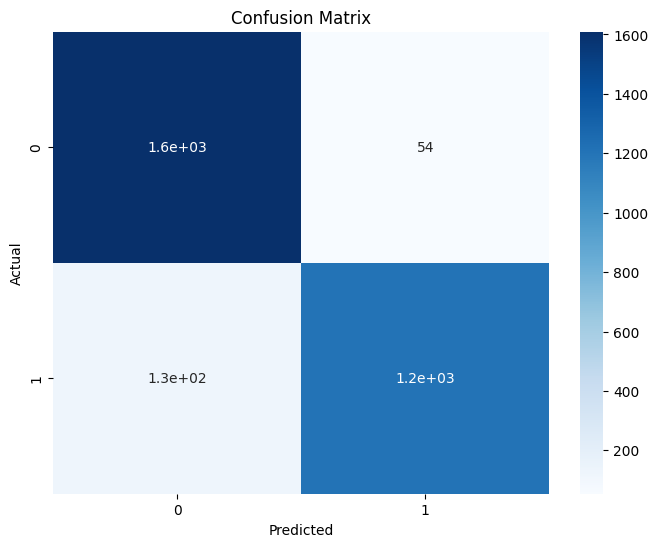

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

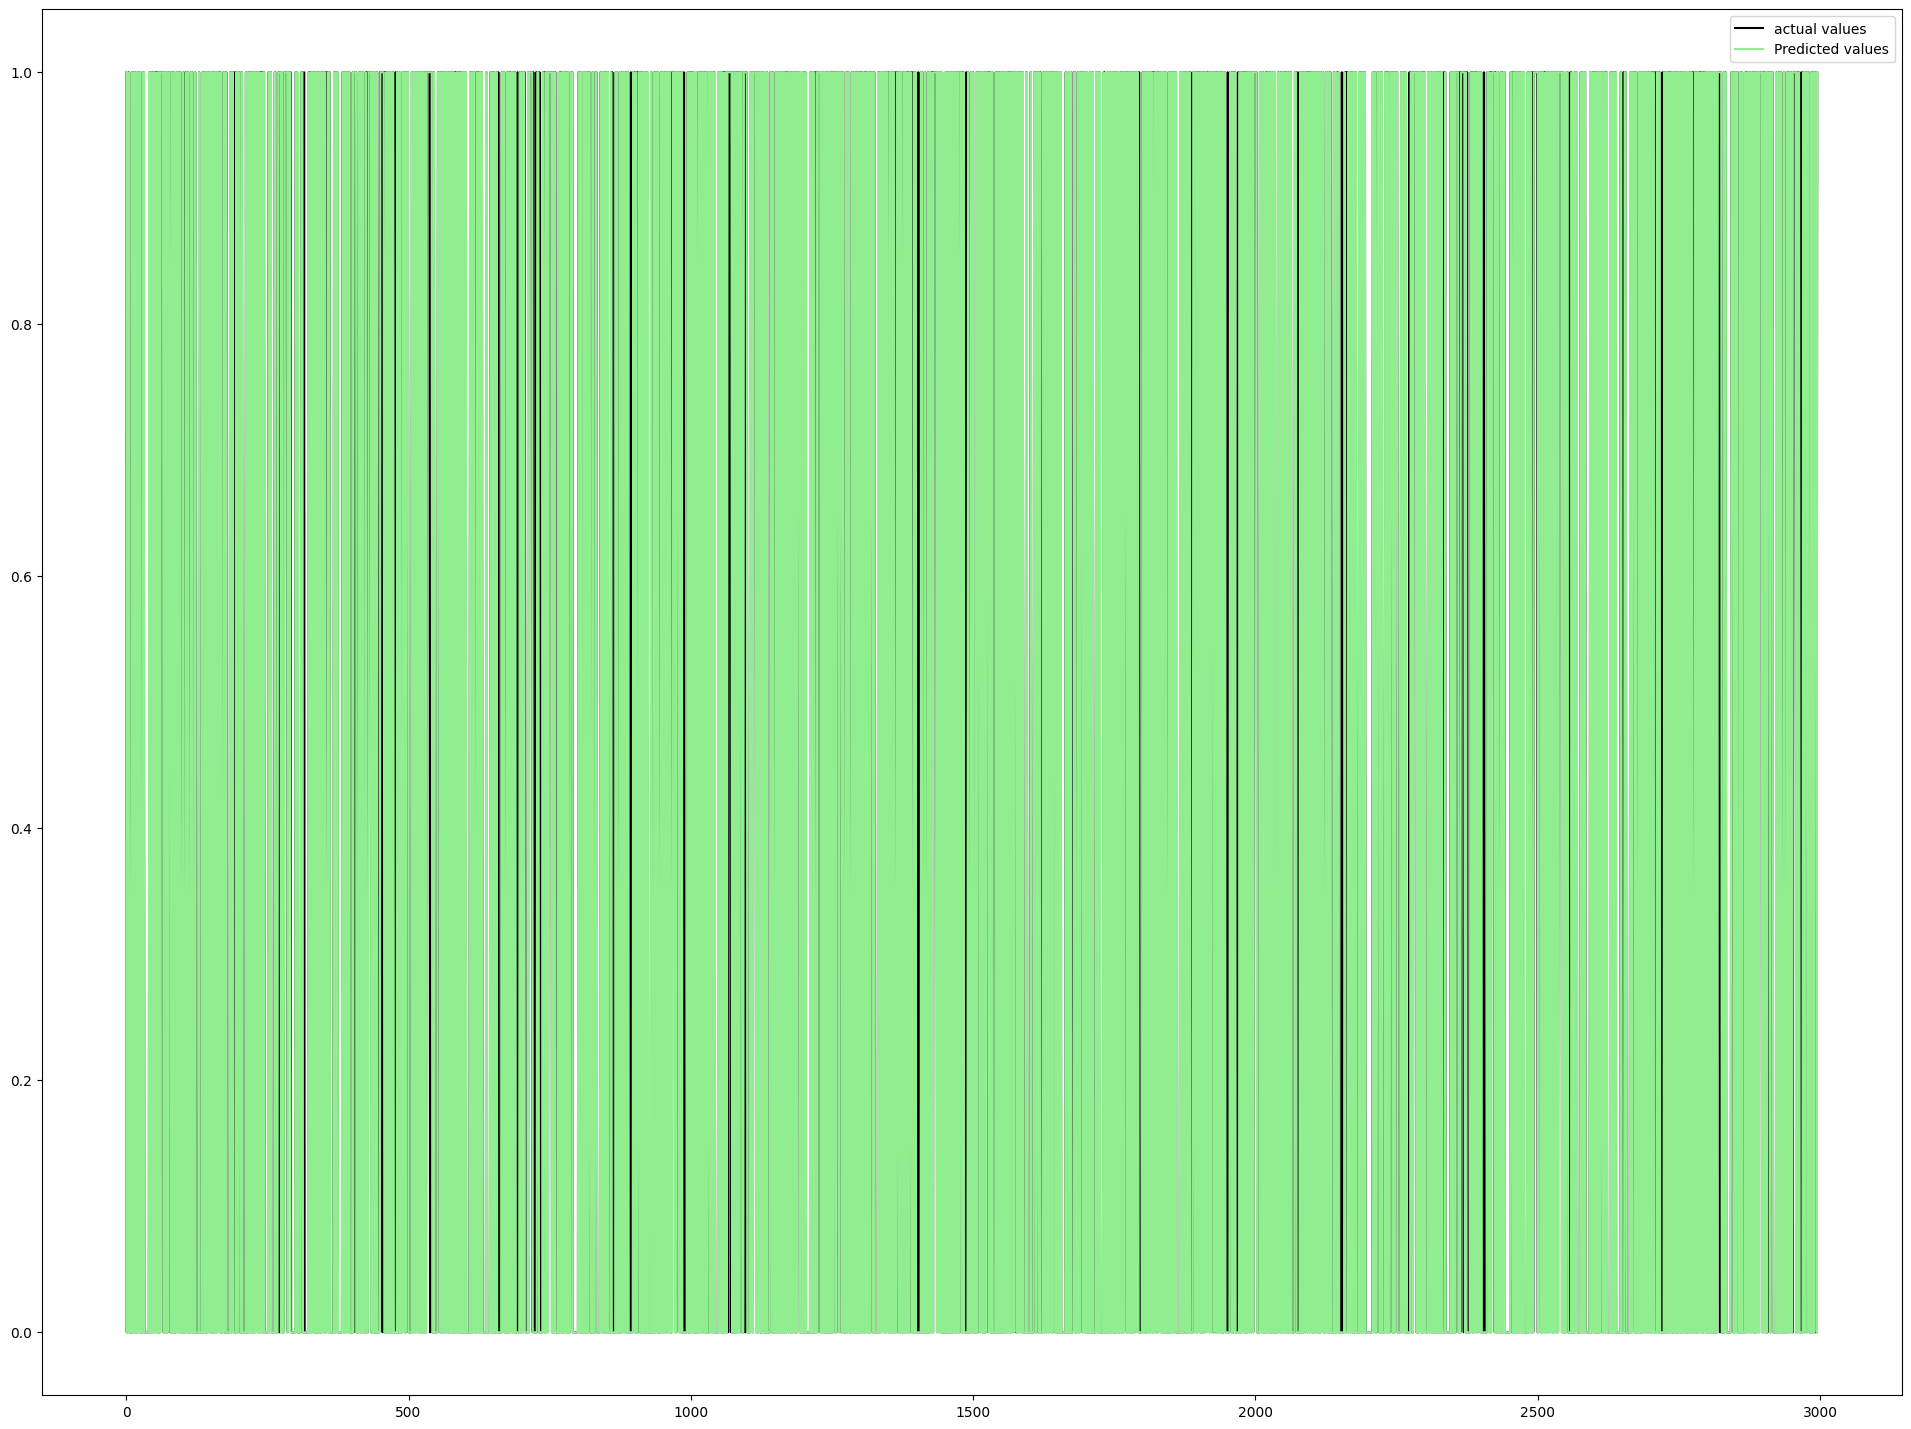

In [31]:
# fitting the size of the plot
plt.figure(figsize=(24, 18))
# plotting the graphs
plt.plot([i for i in range(len(x_test))],y_test, color = 'black',label="actual values")
plt.plot([i for i in range(len(x_test))],y_pred, color='lightgreen', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [52]:
features=[4426.67,4104.1,4309.74,4167.69,4345.13,4613.33,4061.03,4593.85,4196.41,4230.77,4239.49,4311.79,4684.1,4474.87]
scaled_featurs=scaler_loaded.transform([features])
model_loaded.predict(scaled_featurs)

array([1])